<font size=3 color='blue'>
    
  # <center>Tarea 1, marzo 6 del 2022</center> 

<font size=3 color='blue'>
    
  # <center>Ajuste del experimento de un riel inclinado con una función</center> 

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlkDz7k-mS1zDHiqCWIRyRQzAlyYGx-qIsHQ&usqp=CAU)

<font size=4>En esta tarea vamos a repetir el procedimiento expuesto en clase, con la nueva perspectiva de atacar el problema del plano inclinado.

<font size=2 color='blue'>
    
# Generación de las muestras

<font size=4 >
$$ $$
Se genera un conjunto de $m$ muestras aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_m,y_m)$), las cuales simulan nuestros resultados de medición en el laboratorio de Mecánica

In [1]:
# Importing the python libraries

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# To have a reproducible code we use a random seed 
np.random.seed(3)

In [2]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2 + error 
        
    return x, y


In [3]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100000.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


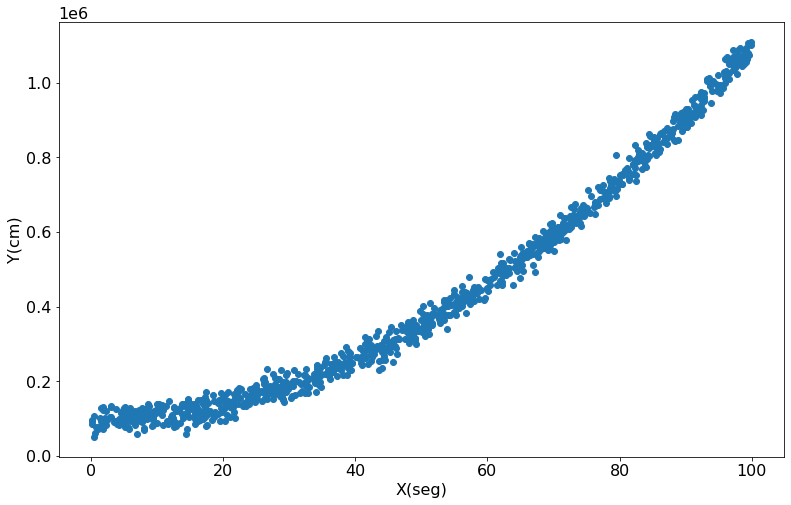

In [4]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=2 color='blue'>

# 1. Buscando la correlación entre las muestras de manera manual:

<font size=4>Para encontrar la correlación entre las muestras, proponemos un conjunto de funciones definidas mediante la siguiente relación *cuadrática*:
    
$$
F(X, W1, W2 , b) = b + W_1 X + W_2 X^2 $$




<font size=4 color='red'> a) Comenzamos por establecer un primer "guess" de los posibles valores que pueden tomar nuestras incógnitas

In [5]:
weight1_0 = 1000
weight2_0 = 100
bias_0 = 100000

<font size=4 color="blue">

Se grafica la correspondiente función $F(X, W1, W2 , b)$, junto con los puntos que representan a las muestras

In [25]:
# Function for plotting (x,y) and (x,y_)

def plot_x_y_y__(x, y, y_):
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    #Plotting function
    plt.scatter(x, y_, color='red', label='F(X, W, b)') 
    plt.legend()

    #Plotting samples
    plt.scatter(x, y, alpha=.2)

    plt.show()
    

<font size=4>

Se grafica la correspondiente función f para los valores $x_i$, así como las muestras $(x_i, y_i)$

residuo:   60958.40


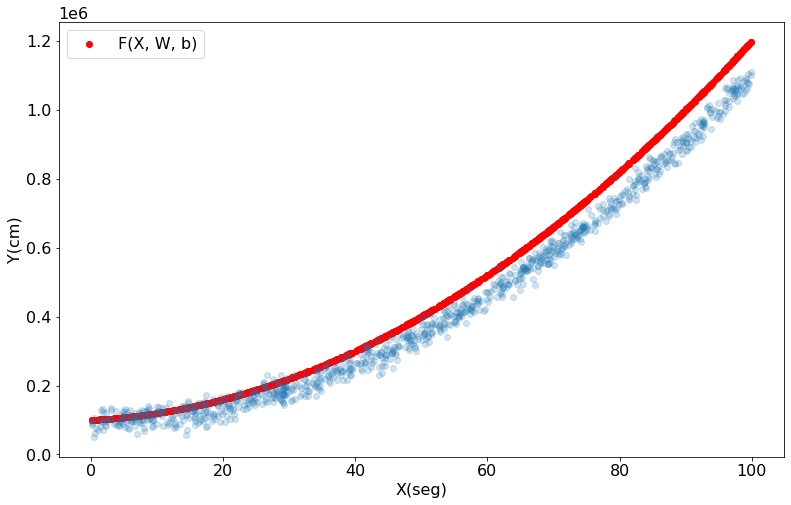

In [27]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)

y_ = weight2_0 *x**2+weight1_0*x + bias_0

# Using the function F, the residuos is calculated by comparing the calculated and measured values

residuo = np.sqrt(np.mean((y-y_)**2))

print('residuo: {0:10.2f}'.format( residuo))

plot_x_y_y__(x, y, y_)

<font size=4 color="blue">

De la gráficas se observa que la función está lejos de describir correctamente la correlación entre los puntos.

Los valores de los pesos  $w_2$, $w_1$,  y el bias  𝑏  se actualizan iterativamente a prueba y error. Para ello

se hacen los cambios de acuerdo a la sugerencia de lo observado en la gráfica.

<font size=4 color=red>

b)Definan una función que actualice los pesos de nuestra función a ajustar, y devuelve dichos argumentos actualizados, así como el arreglo $y_$ y el error cuadrático medio. Pueden tomar de referencia la función `update_weight_biases` del notebook de la clase 2.

In [43]:
def update_weights_biases(x, y, weight1, weight2 ,bias, delta_weight1, delta_weight2, delta_bias):
    
    weight1 = weight1 + delta_weight1
    
    weight2 = weight2 + delta_weight2
    
    bias = bias + delta_bias
    
    y_ = weight2*x**2+ weight1*x + bias
       
    mse = np.mean((y - y_)**2)
    
    #print('residuo: {:10.2f}'.format(residuo))   
        
    return weight1, weight2, bias, y_, mse

<font size=4 color=red>
c)Realizar una gráfica, usando la función `update_weights_biases` para calcular la actualización de los pesos y el bias. Puedes proponer cualquier valor para actualizar los parámetros.

MSE: 587709739.1653154
RMSE: 24242.725489625034


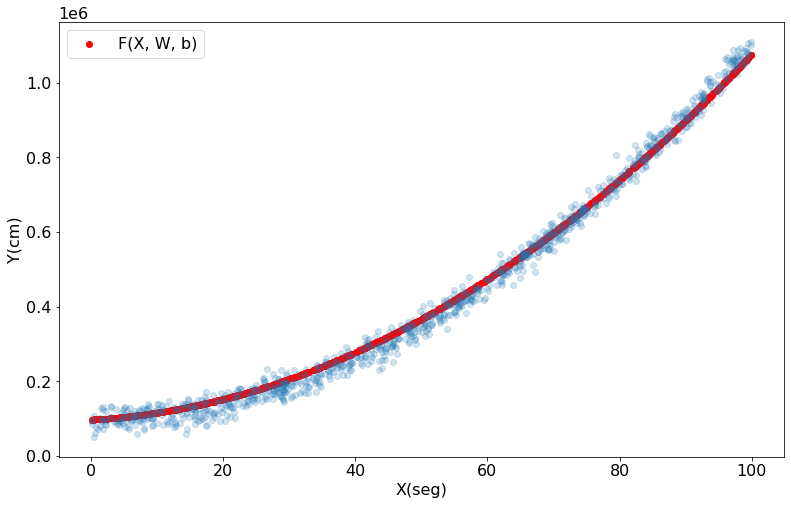

In [59]:
weight1 = weight1_0
weight2 = weight2_0
bias = bias_0
delta_w1 = -10
delta_w2 = -12
delta_b = -3000

weight2, weight1, bias, y_, mse = update_weights_biases(x, y , weight1, weight2 ,bias, delta_w1, delta_w2,delta_b)

print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
plot_x_y_y__(x, y, y_) 

<font size=4 color='red'>
d) Ahora, actualiza todos los parámetros de manera iterativa, durante el número de ciclos que consideres adecuados. Puedes comenzar trabajando con una sola variable y dejar fijas las demás, como se propone en el notebook 2 de la clase.

Anexa también la gráfica de costo vs pesos, de modo que puedas escoger los parámetros adecuado en donde se minimiza dicho costo.
    
A continuación te mostrarmos un ejemplo de código, para la variación del peso $w_2$. Tú lo tienes que hacer para encontrar los 3 parámetros.

In [92]:
update_outputs = []

weight1 = weight1_0
weight2 = weight2_0
bias = 50000
delta_w2 = -1.2
delta_w1 =  -1
delta_b = -300
iterations = 10

for i in range(iterations):
    
    weight2, weight1 ,bias, y_, mse = update_weights_biases(x, y , weight1, weight2 ,bias, delta_w1, delta_w2,delta_b)
    
    update_outputs.append([weight2, weight1, bias, y_, mse])
    
    if i % 2 == 0 :
            print(i+1,': weight2: {0:8.2f}    weight1: {1:8.2f}    bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight2, weight1, bias, mse))

1 : weight2:   999.00    weight1:    98.80    bias: 49700.00   MSE: 984854520.07
3 : weight2:   996.80    weight1:    96.60    bias: 49100.00   MSE: 854892343.89
5 : weight2:   994.60    weight1:    94.40    bias: 48500.00   MSE: 941621614.60
7 : weight2:   992.40    weight1:    92.20    bias: 47900.00   MSE: 1245042332.21
9 : weight2:   990.20    weight1:    90.00    bias: 47300.00   MSE: 1765154496.71


In [94]:
update_outputs[i][2]

47300

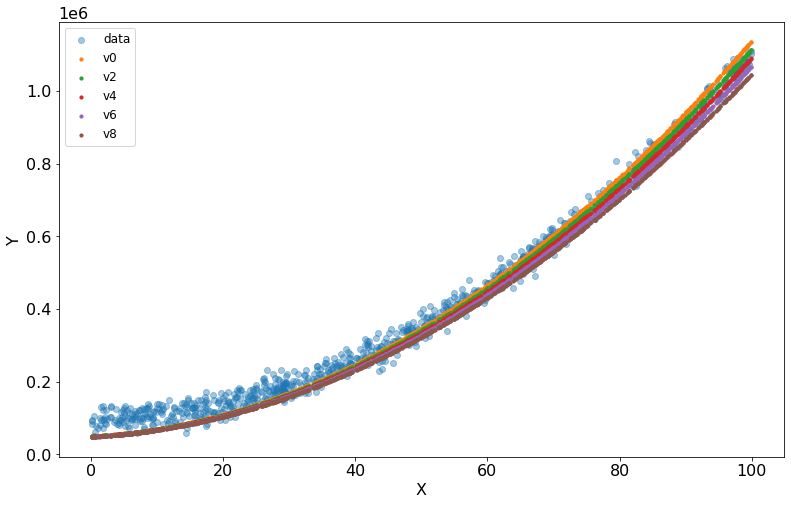

In [93]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y, label='data',alpha=.4)

for i in range(0,iterations,2):

    plt.scatter(x, update_outputs[i][1]*x**2 + update_outputs[i][0]*x + update_outputs[i][2], label='v' + str(i),s=10)
    plt.legend()

plt.legend()

plt.show()

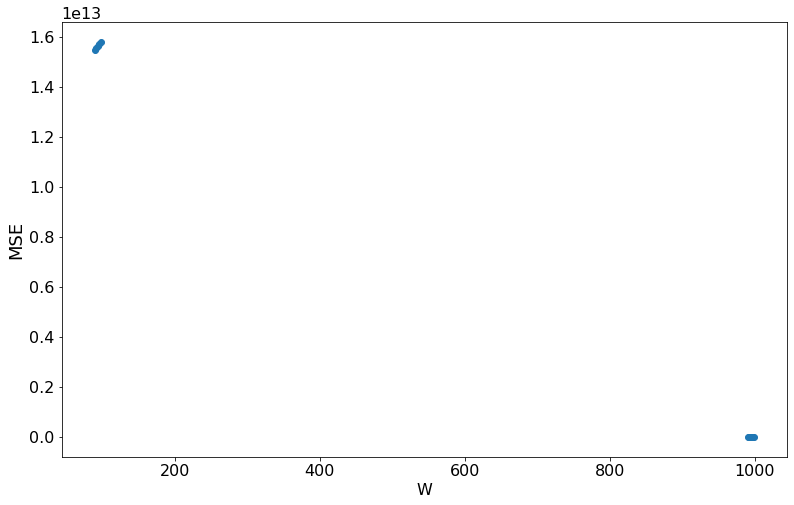

In [95]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

weights2 = []

mse = []

for update_output in update_outputs:
    
    weights2.append(update_output[0])
    
    mse.append(update_output[4])
    
plt.scatter(weights2, mse)


plt.show()

In [96]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w2_opt = update_outputs[index_min][0]
w1_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]
print('Los valores optimos de los parámetros son W2 = {0:5.2f}  W1 = {1:5.2f}   b= {2:5.2f} ' \
      .format(w2_opt,w1_opt, b_opt))

El MSE mas pequeño tiene el valor: 854892343.89
Los valores optimos de los parámetros son W2 = 996.80  W1 = 96.60   b= 49100.00 


<font size=2 color='blue'>

# 2. Ajuste usando `curve_fit`

<font size=4 color=red>a) Define la función F(X, W1, W2, b) en la siguiente celda

In [106]:
def mua(x, w2, w1, b):
    return weight2*x**2+ weight1*x + bias

<font size=4, color=red>b) Define una lista llamada `p0`, en donde pondrás, en el orden adecuado, un primer "guess" para todos los parámetros a encontrar en la función `mua`

In [107]:
p0 = (996.80, 96.60, 49100.00)

<font size=4 color=red>Usando la función `curve_fit` de `scipy.optimize`, encuentra los parámetros óptimos que ajustan mejor la función cuadrática a nuestros datos. Revisa el notebook que se anexó en la clase 2 llamado `Newton-Raphson-Descendent.ipynb` 

In [108]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(mua, x, y, p0)

In [109]:
print(popt)

[  996.8    96.6 49100. ]


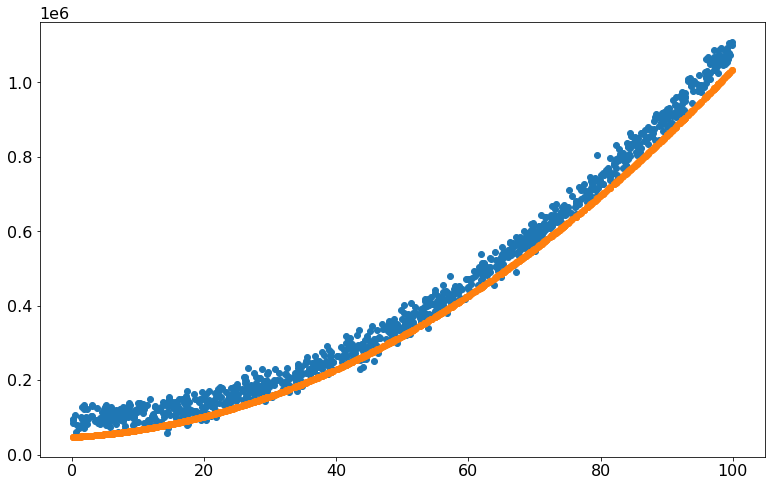

In [110]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.scatter(x, y)
plt.scatter(x, mua(x, *popt))

plt.show()